<a href="https://colab.research.google.com/github/GeXand/2020-Coding-Challenge/blob/master/Feature_Extraction_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acoustic Feature Extraction Pipeline

openSMILE extracts some of the acoustic features we are interested in from the GeMAPS parameter set. The remaining features are loaded in from a csv that is generated from a [praat script](https://drive.google.com/file/d/12l-EUo_0Upyy2pyrNijn2OlNX6ZNYnK_/view?usp=sharing). These are combined into a singular dataframe that also includes some synthesized features like Acoustic Voice Quality Index (AVQI).

In [1]:
!sudo apt-get install sox
!pip install opensmile
!pip install pydub

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3
Suggested packages:
  file libsox-fmt-all
The following NEW packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3 sox
0 upgraded, 8 newly installed, 0 to remove and 39 not upgraded.
Need to get 760 kB of archives.
After this operation, 6,717 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopencore-amrnb0 amd64 0.1.3-2.1 [92.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopencore-amrwb0 amd64 0.1.3-2.1 [45.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main a

## Load the data

- Link to the directory of relevant data (for now this is the folder 'to_extract')
  - Here, we use `glob.glob` to grab the list of audio files
- Have csv of extracted features from praat ready in the folder


### NOTE ON ACCESSING DATASETS AFTER MOUNTING TO DRIVE

- Please be sure to have a shortcut to the 'data' folder in drive and have files you want to extract from in the 'to_extract' folder


In [2]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [3]:
!ls /gdrive/MyDrive/data/

 control_extracted_features.csv       features1.csv
 control_extracted_features-rx8.csv  'sample of audio-recorded data'
 DementiaBank			      to_extract


In [5]:
import pathlib
import glob
from scipy.io import wavfile
import IPython

In [35]:
# Grab the list of audio_file paths
audio_file_paths = glob.glob("/gdrive/MyDrive/data/to_extract/*.wav")
audio_file_paths

['/gdrive/MyDrive/data/to_extract/001-2-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/001-0-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/003-0-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/005-0-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/005-2-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/007-3-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/007-1-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/010-0-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/010-2-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/010-1-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/010-4-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/014-2-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/016-0-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/010-3-rx8.wav',
 '/gdrive/MyDrive/data/to_extract/016-1-rx8.wav']

## (If necessary) Convert .mp3 to .wav

- Use pydub to convert audio
  - Find a better way to do this. This is a temporary workaround

In [18]:
is_converted = input("Are the audio files already .wav files?")

Are the audio files already .wav files?n


In [25]:
if is_converted.lower()[0] == "n":
  from os import path
  from pydub import AudioSegment

  # files                                                                         
  destinations = ["/gdrive/MyDrive/DementiaBank/" + pathlib.Path(a_file).parent.name + ".wav_files/" + pathlib.Path(a_file).name[:-4] + ".wav" for a_file in audio_file_paths] # This is a code smell. [:-4] strips ".mp4 from the filename"  
  print(destinations)
  # convert wav to mp3                                                            
  for src, dst in zip(audio_file_paths, destinations):
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")

['/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/062-3.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/010-4.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/033-0.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/033-4.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/030-0.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/029-0.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/058-3.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/039-0.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/066-0.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/035-0.wav', '/gdrive/MyDrive/DementiaBank/dementia.English.Pitt.Dementia.cookie.wav_files/089-0.wav', '/gdrive/

## (Optional) Separate out Mono Sound from Stereo Sound

- May not be necessary depending on how we separate speakers - we can also just extract features for one channel from any file regardless

In [ ]:
mono_indices = []

for i in range(len(audio_file_paths)):
  _, _data = wavfile.read(audio_file_paths[i])

  if _data.ndim == 1:
    mono_indices.append(i)

mono_indices = set(mono_indices)

In [ ]:
stereo_files = [audio_file_paths[i] for i in range(len(audio_file_paths)) if i not in mono_indices]
mono_files = [audio_file_paths[i] for i in range(len(audio_file_paths)) if i in mono_indices]
print("Stereo files:")
print(stereo_files)
print("Mono files:")
print(mono_files)

Stereo files:
['/gdrive/MyDrive/data/to_extract/002-0.wav', '/gdrive/MyDrive/data/to_extract/006-3.wav', '/gdrive/MyDrive/data/to_extract/002-3.wav', '/gdrive/MyDrive/data/to_extract/002-2.wav', '/gdrive/MyDrive/data/to_extract/002-1.wav', '/gdrive/MyDrive/data/to_extract/015-0.wav', '/gdrive/MyDrive/data/to_extract/013-3.wav', '/gdrive/MyDrive/data/to_extract/013-2.wav', '/gdrive/MyDrive/data/to_extract/013-0.wav', '/gdrive/MyDrive/data/to_extract/006-4.wav', '/gdrive/MyDrive/data/to_extract/006-2.wav', '/gdrive/MyDrive/data/to_extract/015-2.wav', '/gdrive/MyDrive/data/to_extract/015-3.wav', '/gdrive/MyDrive/data/to_extract/015-1.wav']
Mono files:
['/gdrive/MyDrive/data/to_extract/013-4.wav']


## Extract features from openSMILE
- openSMILE results in two measurements for each channel in a stereo file. For now, we just take measurements from one.
- (**TODO**: figure out combining measurements from channels - maybe average them?)

In [36]:
import opensmile

smile = opensmile.Smile(
    feature_set = opensmile.FeatureSet.GeMAPSv01b,
    feature_level = opensmile.FeatureLevel.Functionals,
    channels=[0]
)

feature_df = smile.process_files(audio_file_paths)
feature_df.reset_index(inplace=True)
feature_df

,file,start,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
0,/gdrive/MyDrive/data/to_extract/001-2-rx8.wav,0 days,0 days 00:01:21.293061224,26.436995,0.330805,20.722668,23.805550,27.904142,7.181475,454.686066,897.782349,112.291695,204.931351,0.374238,0.981699,0.022788,0.288819,0.678908,0.656119,4.757158,3.143675,3.649883,2.695471,0.042224,1.517193,1.547215,0.729939,1.987259,2.611303,-1.493557,-6.189676,20.758358,0.612298,524.615356,0.410636,1203.799194,0.212348,-86.169144,-1.148920,1563.375000,0.195723,-92.240509,-0.981613,2572.496582,0.137630,-94.731422,-0.930059,-15.856271,-0.635324,25.078775,0.484847,0.084758,0.343091,-0.036702,-0.489897,-4.347449,11.839406,0.044302,-0.001878,1.931594,1.440355,0.394530,0.390554,0.303458,0.504157
1,/gdrive/MyDrive/data/to_extract/001-0-rx8.wav,0 days,0 days 00:00:55.196734694,25.475616,0.347158,19.264610,22.414234,32.229126,12.964516,315.260559,585.859558,192.136765,286.028259,0.284893,0.917458,0.043020,0.219709,0.492662,0.449642,4.868793,3.464526,3.653087,2.737289,0.059421,1.590560,1.717344,0.628973,0.709843,6.506675,-1.347344,-8.722110,16.349127,0.776108,560.263306,0.441903,1200.508423,0.220005,-100.638252,-0.978745,1617.028931,0.189408,-102.405067,-0.898857,2647.077393,0.128019,-104.883347,-0.851362,-12.729416,-0.742441,23.708982,0.503225,0.075563,0.435039,-0.028739,-0.657364,-4.678266,11.542583,0.043525,-0.007436,2.446539,2.123027,0.233932,0.237119,0.233796,0.376673
2,/gdrive/MyDrive/data/to_extract/003-0-rx8.wav,0 days,0 days 00:03:55.859591837,23.186512,0.275007,19.074165,23.068790,25.590570,6.516405,269.312805,565.550049,156.894424,231.347366,0.245108,1.281706,0.045379,0.113577,0.379389,0.334010,4.502355,4.235019,3.521996,3.178756,0.053046,2.065260,1.648196,0.708796,0.940378,5.780494,1.708581,11.263334,23.551245,0.751660,511.114929,0.397366,1251.021606,0.201094,-121.407753,-0.775830,1558.230713,0.176810,-126.016327,-0.688090,2569.933105,0.124453,-128.054764,-0.657244,-17.766432,-0.502103,27.287039,0.374762,0.057490,0.633657,-0.025720,-0.665090,-12.145862,19.531343,0.045522,-0.011931,0.907395,1.827975,0.214524,0.247696,0.314279,0.777905

In [37]:
# remove path from file names
path_length = len("/gdrive/MyDrive/data/to_extract/")
feature_df['file'] = feature_df['file'].apply(lambda i: i[path_length:])

# set file to index, remove start column (since its always 0)
feature_df.set_index('file', inplace=True)
feature_df.drop('start', inplace=True, axis=1)
feature_df

,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
file,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001-2-rx8.wav,0 days 00:01:21.293061224,26.436995,0.330805,20.722668,23.805550,27.904142,7.181475,454.686066,897.782349,112.291695,204.931351,0.374238,0.981699,0.022788,0.288819,0.678908,0.656119,4.757158,3.143675,3.649883,2.695471,0.042224,1.517193,1.547215,0.729939,1.987259,2.611303,-1.493557,-6.189676,20.758358,0.612298,524.615356,0.410636,1203.799194,0.212348,-86.169144,-1.148920,1563.375000,0.195723,-92.240509,-0.981613,2572.496582,0.137630,-94.731422,-0.930059,-15.856271,-0.635324,25.078775,0.484847,0.084758,0.343091,-0.036702,-0.489897,-4.347449,11.839406,0.044302,-0.001878,1.931594,1.440355,0.394530,0.390554,0.303458,0.504157
001-0-rx8.wav,0 days 00:00:55.196734694,25.475616,0.347158,19.264610,22.414234,32.229126,12.964516,315.260559,585.859558,192.136765,286.028259,0.284893,0.917458,0.043020,0.219709,0.492662,0.449642,4.868793,3.464526,3.653087,2.737289,0.059421,1.590560,1.717344,0.628973,0.709843,6.506675,-1.347344,-8.722110,16.349127,0.776108,560.263306,0.441903,1200.508423,0.220005,-100.638252,-0.978745,1617.028931,0.189408,-102.405067,-0.898857,2647.077393,0.128019,-104.883347,-0.851362,-12.729416,-0.742441,23.708982,0.503225,0.075563,0.435039,-0.028739,-0.657364,-4.678266,11.542583,0.043525,-0.007436,2.446539,2.123027,0.233932,0.237119,0.233796,0.376673
003-0-rx8.wav,0 days 00:03:55.859591837,23.186512,0.275007,19.074165,23.068790,25.590570,6.516405,269.312805,565.550049,156.894424,231.347366,0.245108,1.281706,0.045379,0.113577,0.379389,0.334010,4.502355,4.235019,3.521996,3.178756,0.053046,2.065260,1.648196,0.708796,0.940378,5.780494,1.708581,11.263334,23.551245,0.751660,511.114929,0.397366,1251.021606,0.201094,-121.407753,-0.775830,1558.230713,0.176810,-126.016327,-0.688090,2569.933105,0.124453,-128.054764,-0.657244,-17.766432,-0.502103,27.287039,0.374762,0.057490,0.633657,-0.025720,-0.665090,-12.145862,19.531343,0.045522,-0.011931,0.907395,1.827975,0.214524,0.247696,0.314279,0.777905
005-0-rx8.wav,0 days 00:01:22.808163265,26.634357,0.277446,24.181

## Load features from praat and append to Dataframe

In [38]:
# Grab features extracted from Praat
import pandas as pd
praat_feature_df = pd.read_csv('/gdrive/MyDrive/data/to_extract/dementia_praat_features-rx8.csv', index_col=0)
praat_feature_df

,spectral_cog,energy_concentration,cpp,ltas_mean,ltas_stddev,ltas_slope,ltas_tilt,shimmer_local,speech_rate,articulation_rate,average_syllable_duration,pause_rate,rPVI,nPVI
file,,,,,,,,,,,,,,
001-0-rx8.wav,1516.133357,-4.851923e-14,17.154504,14.188036,22.859184,-21.792599,-12.920365,15.968041,2.699435,4.767334,0.209761,0.434808,0.387971,74.451148
001-2-rx8.wav,1477.757626,-1.481483e-13,16.526836,16.355962,24.130918,-21.784257,-12.995146,11.909269,2.460235,3.989786,0.250640,0.381336,0.371817,74.971736
003-0-rx8.wav,975.819662,1.502353e-13,10.883538,16.356035,24.334830,-25.804987,-13.639745,12.476648,1.288902,4.068522,0.245789,0.368864,0.958453,89.516116
005-0-rx8.wav,1105.475658,-1.091048e-13,13.992498,16.646525,24.718273,-22.511496,-11.757928,11.196663,0.869479,4.535124,0.220501,0.229446,1.788684,87.874405
005-2-rx8.wav,1490.531311,-7.939097e-14,11.834896,6.520725,13.537054,-18.364834,-14.280688,11.467493,1.104615,3.861039,0.258998,0.235410,1.303538,90.660958
007-1-rx8.wav,2269.849359,-4.363082e-14,16.129846,-3.018714,3.449233,-18.026776,-11.430988,12.501257,2.310075,3.978298,0.251364,0.275009,0.458758,72.068129
007-3-rx8.wav,1455.960768,-7.416998e-14,13.832852,5.056155,12.995399,-24.117209,-11.266089,8.447213,2.174645,3.864606,0.258759,0.299951,0.400128,68.883192
010-0-rx8.wav,1971.774201,-2.143833e-13,13.380806,-1.691717,5.551854,-16.195203,-12.560961,14.708979,2.050940,3.924401,0.254816,0.338851,0.548458,74.263218
010-1-rx8.wav,2006.083305,1.053840e-13,22.093828,2.035862,8.755047,-17.154820,-12.340477,13.273755,2.115271,4.346246,0.230084,0.451430,0.497982,80.445122


In [39]:
# combine the dataframes
import pandas as pd
feature_df = pd.concat([feature_df, praat_feature_df], axis=1)
feature_df

,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,spectral_cog,energy_concentration,cpp,ltas_mean,ltas_stddev,ltas_slope,ltas_tilt,shimmer_local,speech_rate,articulation_rate,average_syllable_duration,pause_rate,rPVI,nPVI
001-2-rx8.wav,0 days 00:01:21.293061224,26.436995,0.330805,20.722668,23.805550,27.904142,7.181475,454.686066,897.782349,112.291695,204.931351,0.374238,0.981699,0.022788,0.288819,0.678908,0.656119,4.757158,3.143675,3.649883,2.695471,0.042224,1.517193,1.547215,0.729939,1.987259,2.611303,-1.493557,-6.189676,20.758358,0.612298,524.615356,0.410636,1203.799194,0.212348,-86.169144,-1.148920,1563.375000,0.195723,-92.240509,-0.981613,2572.496582,0.137630,-94.731422,-0.930059,-15.856271,-0.635324,25.078775,0.484847,0.084758,0.343091,-0.036702,-0.489897,-4.347449,11.839406,0.044302,-0.001878,1.931594,1.440355,0.394530,0.390554,0.303458,0.504157,1477.757626,-1.481483e-13,16.526836,16.355962,24.130918,-21.784257,-12.995146,11.909269,2.460235,3.989786,0.250640,0.381336,0.371817,74.971736
001-0-rx8.wav,0 days 00:00:55.196734694,25.475616,0.347158,19.264610,22.414234,32.229126,12.964516,315.260559,585.859558,192.136765,286.028259,0.284893,0.917458,0.043020,0.219709,0.492662,0.449642,4.868793,3.464526,3.653087,2.737289,0.059421,1.590560,1.717344,0.628973,0.709843,6.506675,-1.347344,-8.722110,16.349127,0.776108,560.263306,0.441903,1200.508423,0.220005,-100.638252,-0.978745,1617.028931,0.189408,-102.405067,-0.898857,2647.077393,0.128019,-104.883347,-0.851362,-12.729416,-0.742441,23.708982,0.503225,0.075563,0.435039,-0.028739,-0.657364,-4.678266,11.542583,0.043525,-0.007436,2.446539,2.123027,0.233932,0.237119,0.233796,0.376673,1516.133357,-4.851923e-14,17.154504,14.188036,22.859184,-21.792599,-12.920365,15.968041,2.699435,4.767334,0.209761,0.434808,0.387971,74.451148
003-0-rx8.wav,0 days 00:03:55.859591837,23.186512,0.275007,19.074165,23.068790,25.590570,6.516405,269.312805,565.550049,156.894424,231.347366,0.245108,1.281706,0.045379,0.113577,0.379389,0.334010,4.502355,4.235019,3.521996,3.178756,0.053046,2.065260,1.648196,0.708796,0.940378,5.780494,1.708581,11.263334,23.551245,0.751

In [40]:
# Calculate Acoustic Voice Quality Index (AVQI)
feature_df['AVQI'] = 2.571*(3.295 - 0.111*feature_df.cpp - 0.073*feature_df.HNRdBACF_sma3nz_amean
                            - 0.213*feature_df.shimmer_local + 2.789*feature_df.shimmerLocaldB_sma3nz_amean
                            - 0.032*feature_df.ltas_slope + 0.077*feature_df.ltas_tilt)
feature_df

,end,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_percentile20.0,loudness_sma3_percentile50.0,loudness_sma3_percentile80.0,loudness_sma3_pctlrange0-2,loudness_sma3_meanRisingSlope,loudness_sma3_stddevRisingSlope,loudness_sma3_meanFallingSlope,loudness_sma3_stddevFallingSlope,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,HNRdBACF_sma3nz_amean,HNRdBACF_sma3nz_stddevNorm,logRelF0-H1-H2_sma3nz_amean,logRelF0-H1-H2_sma3nz_stddevNorm,logRelF0-H1-A3_sma3nz_amean,logRelF0-H1-A3_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F1amplitudeLogRelF0_sma3nz_amean,F1amplitudeLogRelF0_sma3nz_stddevNorm,F2frequency_sma3nz_amean,F2frequency_sma3nz_stddevNorm,F2amplitudeLogRelF0_sma3nz_amean,F2amplitudeLogRelF0_sma3nz_stddevNorm,F3frequency_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3amplitudeLogRelF0_sma3nz_amean,F3amplitudeLogRelF0_sma3nz_stddevNorm,alphaRatioV_sma3nz_amean,alphaRatioV_sma3nz_stddevNorm,hammarbergIndexV_sma3nz_amean,hammarbergIndexV_sma3nz_stddevNorm,slopeV0-500_sma3nz_amean,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_amean,slopeV500-1500_sma3nz_stddevNorm,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,spectral_cog,energy_concentration,cpp,ltas_mean,ltas_stddev,ltas_slope,ltas_tilt,shimmer_local,speech_rate,articulation_rate,average_syllable_duration,pause_rate,rPVI,nPVI,AVQI
001-2-rx8.wav,0 days 00:01:21.293061224,26.436995,0.330805,20.722668,23.805550,27.904142,7.181475,454.686066,897.782349,112.291695,204.931351,0.374238,0.981699,0.022788,0.288819,0.678908,0.656119,4.757158,3.143675,3.649883,2.695471,0.042224,1.517193,1.547215,0.729939,1.987259,2.611303,-1.493557,-6.189676,20.758358,0.612298,524.615356,0.410636,1203.799194,0.212348,-86.169144,-1.148920,1563.375000,0.195723,-92.240509,-0.981613,2572.496582,0.137630,-94.731422,-0.930059,-15.856271,-0.635324,25.078775,0.484847,0.084758,0.343091,-0.036702,-0.489897,-4.347449,11.839406,0.044302,-0.001878,1.931594,1.440355,0.394530,0.390554,0.303458,0.504157,1477.757626,-1.481483e-13,16.526836,16.355962,24.130918,-21.784257,-12.995146,11.909269,2.460235,3.989786,0.250640,0.381336,0.371817,74.971736,7.174191
001-0-rx8.wav,0 days 00:00:55.196734694,25.475616,0.347158,19.264610,22.414234,32.229126,12.964516,315.260559,585.859558,192.136765,286.028259,0.284893,0.917458,0.043020,0.219709,0.492662,0.449642,4.868793,3.464526,3.653087,2.737289,0.059421,1.590560,1.717344,0.628973,0.709843,6.506675,-1.347344,-8.722110,16.349127,0.776108,560.263306,0.441903,1200.508423,0.220005,-100.638252,-0.978745,1617.028931,0.189408,-102.405067,-0.898857,2647.077393,0.128019,-104.883347,-0.851362,-12.729416,-0.742441,23.708982,0.503225,0.075563,0.435039,-0.028739,-0.657364,-4.678266,11.542583,0.043525,-0.007436,2.446539,2.123027,0.233932,0.237119,0.233796,0.376673,1516.133357,-4.851923e-14,17.154504,14.188036,22.859184,-21.792599,-12.920365,15.968041,2.699435,4.767334,0.209761,0.434808,0.387971,74.451148,6.247547
003-0-rx8.wav,0 days 00:03:55.859591837,23.186512,0.275007,19.074165,23.068790,25.590570,6.516405,269.312805,565.550049,156.894424,231.347366,0.245108,1.281706,0.045379,0.113577,0.379389,0.334010,4.502355,4.235019,3.521996,3.178756,0.053046,2.065260,1.648196,0.708796,0.940378,5.780494,1.708581,11

## Export to csv for use outside of this notebook

In [41]:
feature_df.to_csv("/gdrive/MyDrive/data/dementia_extracted_features-rx8.csv")

## Praat and openSMILE comparison

# Experimentation with features

e.g. graphing pairs of higher level features (e.g. speech rate & AVQI) and compare the controls and alzheimer patients

In [45]:
control_feature_df = pd.read_csv('/gdrive/MyDrive/data/control_extracted_features.csv', index_col=0)
dementia_feature_df = pd.read_csv('/gdrive/MyDrive/data/dementia_extracted_features.csv', index_col=0)
control_feature_rx8_df = pd.read_csv('/gdrive/MyDrive/data/control_extracted_features-rx8.csv', index_col=0)
dementia_feature_rx8_df = pd.read_csv('/gdrive/MyDrive/data/dementia_extracted_features-rx8.csv', index_col=0)

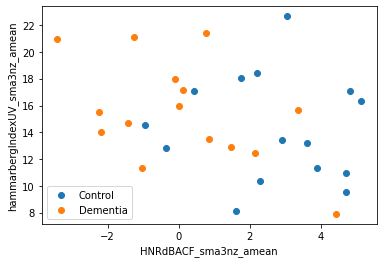

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

param1 = 'HNRdBACF_sma3nz_amean'
param2 = 'hammarbergIndexUV_sma3nz_amean'

plt.scatter(control_feature_df[param1], control_feature_df[param2], label="Control")
plt.scatter(dementia_feature_df[param1], dementia_feature_df[param2], label="Dementia")
ax.legend()
ax.set_xlabel(param1)
ax.set_ylabel(param2)
plt.show()

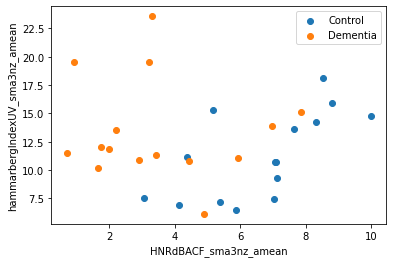

In [57]:
# rx8 dialogue isolated features

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

param1 = 'HNRdBACF_sma3nz_amean'
param2 = 'hammarbergIndexUV_sma3nz_amean'

plt.scatter(control_feature_rx8_df[param1], control_feature_rx8_df[param2], label="Control")
plt.scatter(dementia_feature_rx8_df[param1], dementia_feature_rx8_df[param2], label="Dementia")
ax.legend()
ax.set_xlabel(param1)
ax.set_ylabel(param2)
plt.show()